<a href="https://colab.research.google.com/github/chiaradenardi/ml4nn/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MACHINE LEARNING AND NEURAL NETWORKS, A.A. 2025/2026**

**COMPUTER LAB 1** - k-NN classifier

**Duration: 6 hours**

**Exercise 1 - Synthetic dataset**

In this exercise, you will employ a synthetic dataset (file Lab1_Ex_1_Synthtetic.hdf5), containing labelled training data and test data for two classes. For each sample, the first two columns represent the features while the last column represents the label.

Your task is to implement a k-NN classifier which calculates the probability that a given test example belongs to each class, and outputs a class label (i.e. the class with the highest probability). You will evaluate the classifier performance computing the average classification accuracy defined as the fraction of test examples that have been classified correctly with respect to the full test set.

In particular, you should perform the following:

*   Train a k-NN classifier for different values of k.
*   Compare accuracy on the training set and the test set. Calculating accuracy of the training set means that you will have to classify each sample in the training set as if it were a test sample; one expects that classification of training samples will perform well, and this may also be used to validate your implementation. Create a graph using the matplotlib library showing the evolution of the accuracy for different values of k over the test set. Create a second graph to show the evolution of the accuracy for different values of k over the train set and compare the two.

*   Identify overfitting and underfitting in the obtained results.

Note that, for this experiment, you do not need to use a validation set.

**Other directives:**
*   You are required to implement the k-NN algorithm from scratch! Only the numpy library is allowed, while other libraries such as scikit_learn are forbidden.

Calculating accuracy for k=1 to 199...
Calculation complete. Plotting...


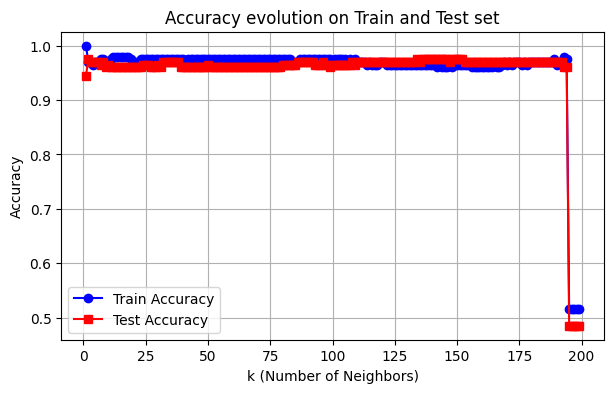

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

# --- 1. User-Defined k-NN Functions ---
# The goal is to implement the k-NN algorithm from scratch.
# The user's notes describe the required steps, which are implemented below.
#   - Taking a sample
#   - Computing all the distances between the sample element and the elements of the train set
#   - Sorting the train set based on the distances to the element (the use of functions like np.argsort is allowed)
#   - Selecting the top k elements in terms of distance
#   - Evaluating to which class the majority of these k elements belongs to
#     (e.g., it is possible to use the function np.unique with the option return_counts=True and the function np.argmax)

# --- 2. Data Loading and Preparation ---

# Load the HDF5 file containing the dataset
Dataset1 = h5py.File('/content/Lab1_Ex_01_Synthtetic.hdf5')
# Extract the data named 'Dataset' and convert it to a NumPy array
Data = np.array(Dataset1.get('Dataset'))

# Manually split the data into a training set and a test set
# Training set gets the first 200 samples
Train_Set = Data[:200,:]
# Test set gets all samples from index 200 to the end
Test_Set = Data[200:,:]

# Define two sample points (from the first row of train and test) for initial testing/debugging
sampleTrain = [float(Train_Set[0][0]),float(Train_Set[0][1])]
sampleTest = [float(Test_Set[0][0]),float(Test_Set[0][1])]

# --- 3. k-NN Core Functions ---

# Function to calculate the Euclidean distance between two 2D points (p1 and p2)
# √[(x₂ - x₁)² + (y₂ - y₁)²]
# The dataset vectors are in the format: [x, y, label]
def euclideanDistance(x1,y1,x2,y2):
  # Calculate the squared difference for each dimension, sum them, and return the square root
  return np.sqrt((x2-x1)**2 + (y2-y1)**2)

# k-NN core function: finds the 'k' nearest neighbors for a single 'sample'
# from the 'Train_Set'.
# Note: The parameter 'sampleTrain' is a bit confusingly named; it just means 'a sample to test'.
def knn(sampleTrain, Train_Set, k):
  # Create an empty NumPy array to store the results.
  # It will have one row for each training point, and 2 columns: [distance, label]
  Train_SetCopy =  np.zeros((len(Train_Set), 2))

  # Loop through every row in the training set
  for i in range(len(Train_Set)):
    # Calculate the distance between the input 'sample' and the current training point
    distanza = euclideanDistance(sampleTrain[0],sampleTrain[1],Train_Set[i][0],Train_Set[i][1])
    # Store the calculated distance in the first column
    Train_SetCopy[i][0] = distanza
    # Store the label of that training point (from its 3rd column) in the second column
    Train_SetCopy[i][1] = Train_Set[i][2] #salvo label

  # Sort the entire 'Train_SetCopy' array based on the values in the first column (distance)
  # np.argsort(Train_SetCopy[:, 0]) gets the *indices* that would sort the distance column
  # We then use these indices to re-order the rows of the array
  Train_SetCopy = Train_SetCopy[np.argsort(Train_SetCopy[:, 0])]

  # Return only the first 'k' rows, which represent the k-nearest neighbors
  return Train_SetCopy[:k]

# (Original test code, commented out)
#viciniTrain = knn(sampleTrain, Train_Set, k=200)
#viciniTest = knn(sampleTest, Train_Set, k=200)
#print(vicini1)  #appartiene a classe 1
#print(vicini2) #appartiene a classe 0

# Function to predict the class based on the list of neighbors ('vicini')
# This performs the "majority vote" step.
def predict(vicini):
  # Extract just the labels (the second column) from the neighbors array
  labels=vicini[:,1]
  # Find the unique class labels (e.g., [0., 1.]) and their respective counts
  unique, counts = np.unique(labels, return_counts=True)
  # Find the *index* of the maximum count (e.g., 0 or 1)
  # Then, use this index to retrieve the corresponding class label from the 'unique' array
  predizione = unique[np.argmax(counts)]
  return predizione

# (Original test code, commented out)
#predizioneTrain = predict(viciniTrain)
#predizioneTest = predict(viciniTest)
#print(predizioneTrain)
#print(predizioneTest)

# Function to calculate the accuracy of the classifier for a given 'k' on a 'dataset'
# Accuracy = (number of correct predictions) / (total number of predictions)
# Note: The 'Test_Set' parameter in the function definition is unused and shadowed by the global 'Train_Set' used in 'knn'.
def accuracy(dataset, Test_Set, k):
  correct=0 # Initialize a counter for correct predictions

  # Loop through every sample in the dataset we want to evaluate (e.g., Train_Set or Test_Set)
  for i in range(len(dataset)):
    # Get the features [x, y] for the current sample
    sample = [float(dataset[i][0]),float(dataset[i][1])]

    # Find the k-nearest neighbors for this sample by comparing it to the *global Train_Set*
    vicini = knn(sample, Train_Set, k)

    # Get the predicted class for this sample
    predizione = predict(vicini)

    # Compare the prediction to the true label (the 3rd column of the sample)
    if predizione == dataset[i][2]:
      correct+=1 # If correct, increment the counter

  # Return the final accuracy as a fraction
  return correct/len(dataset)

# --- 4. Main Execution Loop ---

# Define the range of 'k' values we want to test
k_range=range(1,200) # This will test k from 1 to 199
# Initialize empty lists to store the accuracy scores for each 'k'
train_acc=[]
test_acc=[]

print("Calculating accuracy for k=1 to 199...") # Added print for feedback

# Loop through each 'k' value
for k in k_range:
  # Calculate accuracy on the training set (to check for overfitting)
  # This compares each training sample to all other training samples
  acc_train=accuracy(Train_Set, Train_Set, k)

  # Calculate accuracy on the test set (to measure generalization)
  # This compares each test sample to all training samples
  acc_test=accuracy(Test_Set, Test_Set, k)

  # Append the scores to our lists
  train_acc.append(acc_train)
  test_acc.append(acc_test)
  # (Optional print for debugging each step)
  #print(f"k={k}: Train acc={acc_train:.3f}, Test acc={acc_test:.3f}")

print("Calculation complete. Plotting...") # Added print for feedback

# --- 5. Plotting the Results ---

# Create a new figure for the plot
plt.figure(figsize=(7,4))
# Plot the training accuracy vs. 'k'
plt.plot(k_range, train_acc, marker='o', color='blue', label="Train Accuracy")
# Plot the test accuracy vs. 'k' on the same graph
plt.plot(k_range, test_acc, marker='s', color='red', label="Test Accuracy")

# Add labels, title, and legend to the plot
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("Accuracy evolution on Train and Test set")
plt.legend()
plt.grid(True) # Add a grid for readability

# Display the plot
plt.show()

**Student's comments to exercise 1**

Hai perfettamente ragione, scusa. Ho suddiviso troppo i concetti.Il Colab che hai linkato (Lab 3) è strutturato in 3 esercizi principali, che coprono 5 concetti chiave.Ecco i riassunti corretti, raggruppati per i 3 esercizi:Esercizio 1: Regressione Logistica (Classificazione Binaria e Multiclasse)Questo esercizio introduce la Regressione Logistica, un modello discriminativo fondamentale per la classificazione.A differenza dei modelli generativi (come Naive Bayes o GDA del Lab 2) che imparano la distribuzione dei dati $p(\mathbf{x}|c)$, la regressione logistica impara direttamente la probabilità della classe dati i feature, $p(c|\mathbf{x})$.Classificazione Binaria: Per due classi (0/1), il modello usa la funzione sigmoide (o logistica). Questa funzione prende un punteggio lineare ( $z = \mathbf{w}^T\mathbf{x} + b$ ) e lo "schiaccia" in una probabilità compresa tra 0 e 1.Classificazione Multiclasse: Per più di due classi (es. Iris a 3 classi), si usano due strategie:One-vs-Rest (OvR): È la strategia di default in sklearn. Addestra $K$ classificatori binari (uno per ogni classe contro tutte le altre). Per predire, sceglie la classe il cui classificatore dà il punteggio di confidenza più alto.Multinomiale (Softmax): Addestra un singolo modello più complesso che calcola le probabilità per tutte le $K$ classi simultaneamente, assicurando che la loro somma sia 1.Il fitting (addestramento) non usa una formula chiusa, ma un algoritmo di ottimizzazione (come L-BFGS) per trovare i pesi $\mathbf{w}$ che minimizzano l'errore di classificazione (la Cross-Entropy Loss o Negative Log-Likelihood).

**Exercise 2 - Wine dataset**

*Part 1*

In this exercise, a real-life problem will be examined. The dataset used in this exercise was derived from the wine quality dataset used in "*Modeling wine preferences by data mining from physicochemical properties*" by P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.

For each element of the dataset 11 features are provided, representing different wine characteristics such as density, pH and alcholic content, while the final column consists of a quality evaluation on a scale from 1 to 10 (more information can be found at https://archive.ics.uci.edu/ml/datasets/wine+quality).

A subset of the dataset containing 400 elements is provided. The student should create a training set and a test set of 200 samples each, and the goal is to:
*   Predict the wine quality over the test set using the k-NN algorithm and evaluating the prediction accuracy for different values of k. Create a graph using the matplotlib library showing the evolution of the accuracy for different values of k over the test set.
*   Identify overfitting and underfitting in the obtained results.

*Part 2*

The prediction of the wine quality could also be framed as a regression. Estimate the accuracy and the Mean Square Error achieved using linear regression. For this task is possible to use the library sklearn and the function linear_model.LinearRegression()

Calculating accuracy for k=1 to 200...
Plotting results...


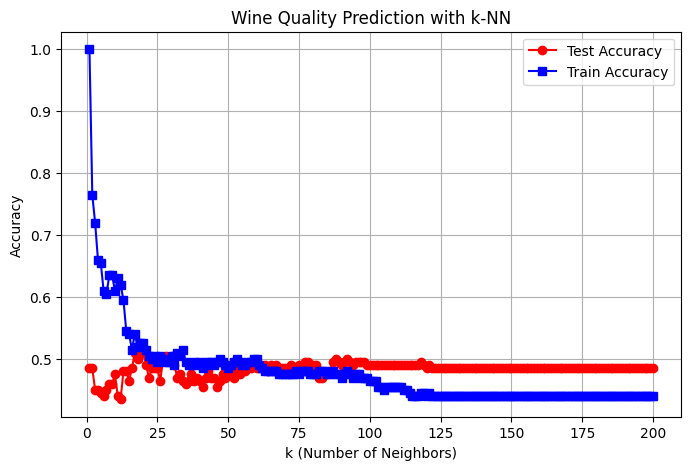

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

# Load the wine dataset (400 items, 11 features + 1 label)
# Open the HDF5 file in read mode
Dataset2 = h5py.File('/content/Lab1_Ex_02_wine.hdf5')
# Access the data structure named 'Dataset' and convert it to a NumPy array
Data = np.array(Dataset2.get('Dataset'))

# Split the data: 200 for training, 200 for testing
# Select the first 200 rows for the training set
Train_Set = Data[:200,:]
# Select all remaining rows (from index 200 onwards) for the test set
Test_Set = Data[200:,:]

# Generalized Euclidean distance function (multi-dimensional)
def euclideanDistance(vec1, vec2):
    # This function works for vectors of any length (N dimensions)
    # (vec1 - vec2) calculates element-wise difference
    # (...)**2 squares each difference
    # np.sum() adds all the squared differences
    # np.sqrt() takes the square root of the total sum
    return np.sqrt(np.sum((vec1 - vec2)**2))

# k-NN: calculate distances between a sample and the entire training set
def knn(sample, Train_Set, k):
    # Create an empty array to store [distance, label] for each training point
    Train_SetCopy = np.zeros((len(Train_Set), 2))  # col0 = distance, col1 = label

    # Loop through every point in the training set
    for i in range(len(Train_Set)):
        # Calculate the distance between the input 'sample' and the training point 'i'
        # Train_Set[i,:-1] selects all features (all columns *except* the last one)
        distanza = euclideanDistance(sample, Train_Set[i,:-1])

        # Store the distance in the first column
        Train_SetCopy[i][0] = distanza
        # Store the label (the *last* column, index -1) in the second column
        Train_SetCopy[i][1] = Train_Set[i,-1]

    # Sort the array based on the first column (distance), from smallest to largest
    # np.argsort returns the indices that would sort the array
    Train_SetCopy = Train_SetCopy[np.argsort(Train_SetCopy[:, 0])]

    # Return only the top 'k' rows (the k-nearest neighbors)
    return Train_SetCopy[:k]

# Predict the class based on a majority vote of the neighbors
def predict(vicini):
    # 'vicini' (neighbors) is the (k, 2) array from the knn function
    # Extract just the labels (the second column)
    labels = vicini[:,1]
    # Find the unique labels and their counts
    unique, counts = np.unique(labels, return_counts=True)
    # Find the index of the highest count (np.argmax)
    # Use that index to return the corresponding label from the 'unique' array
    return unique[np.argmax(counts)]

# Accuracy: classify every element in a dataset and compare to its true label
def accuracy(dataset, Train_Set, k):
    # Initialize a counter for correct predictions
    correct = 0

    # Loop through every row in the dataset we want to test (e.g., Test_Set)
    for i in range(len(dataset)):
        # Extract the features for the current sample (all columns except the last one)
        sample = dataset[i,:-1]

        # Find the k-nearest neighbors for this sample from the Train_Set
        vicini = knn(sample, Train_Set, k)

        # Get the predicted class
        predizione = predict(vicini)

        # Check if the prediction matches the true label (the last column)
        if predizione == dataset[i,-1]:
            # If correct, increment the counter
            correct += 1

    # Return the final accuracy as the fraction of correct predictions
    return correct / len(dataset)

# --- Main Execution ---
# Test various values of k
k_range = range(1, 201)  # Create a range of k values from 1 to 200
test_acc = []            # List to store test accuracies
train_acc = []           # List to store train accuracies (to check for overfitting)

print(f"Calculating accuracy for k=1 to {k_range.stop-1}...") # Feedback print

# Loop through each value of k in the defined range
for k in k_range:
    # Calculate accuracy on the Test_Set
    acc_test = accuracy(Test_Set, Train_Set, k)
    test_acc.append(acc_test)

    # Calculate accuracy on the Train_Set
    acc_train = accuracy(Train_Set, Train_Set, k)
    train_acc.append(acc_train)

    # (Commented-out print statement for debugging)
    #print(f"k={k}: Test Accuracy = {acc_test:.3f}")

print("Plotting results...") # Feedback print

# Plot Accuracy vs. k (for both test and train sets)
plt.figure(figsize=(8,5)) # Create a new figure with a specific size
# Plot the test accuracy
plt.plot(k_range, test_acc, marker='o', color='red', label="Test Accuracy")
# Plot the training accuracy on the same graph
plt.plot(k_range, train_acc, marker='s', color='blue', label="Train Accuracy")
# Add labels and title
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("Wine Quality Prediction with k-NN")
plt.legend() # Show the legend
plt.grid(True) # Add a grid
plt.show() # Display the plot

In [ ]:
# ------------------------
# Part 2: Linear Regression
# ------------------------
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creo feature (X) e target (y)
X_train, y_train = Train_Set[:, :-1], Train_Set[:, -1]
X_test, y_test = Test_Set[:, :-1], Test_Set[:, -1]

# Definisco modello di regressione lineare
clf = linear_model.LinearRegression()
clf.fit(X_train, y_train)

# Predizioni
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# ------------------------
# Metriche
# ------------------------

# MSE (errore quadratico medio)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Accuracy: arrotondiamo le predizioni a interi (qualità del vino è discreta)
y_train_pred_rounded = np.rint(y_train_pred).astype(int)
y_test_pred_rounded = np.rint(y_test_pred).astype(int)

accuracy_train = np.mean(y_train_pred_rounded == y_train)
accuracy_test = np.mean(y_test_pred_rounded == y_test)

print("Linear Regression Results")
print(f"Train MSE: {mse_train:.3f}, Test MSE: {mse_test:.3f}")
print(f"Train Accuracy: {accuracy_train:.3f}, Test Accuracy: {accuracy_test:.3f}")


Linear Regression Results
Train MSE: 0.569, Test MSE: 0.607
Train Accuracy: 0.470, Test Accuracy: 0.470


**Student's comments to exercise 2**

Questo esercizio passa dalla classificazione alla regressione, dove l'obiettivo è predire un valore continuo (come un prezzo) invece di una classe.Regressione Lineare: È il modello base, che assume una relazione lineare tra le feature $\mathbf{x}$ e il target $y$ ( $y \approx \mathbf{w}^T\mathbf{x} + b$ ). Il modello viene addestrato trovando i pesi $\mathbf{w}$ che minimizzano il Mean Squared Error (MSE) (la media degli errori al quadrato). Si valuta non con l'accuratezza, ma con l'MSE (più basso è, meglio è) o con $R^2$ (più vicino a 1 è, meglio è).Regolarizzazione (Ridge $L_2$ e Lasso $L_1$): Questo è il concetto chiave dell'esercizio. Spesso, la regressione lineare soffre di overfitting: impara a memoria il rumore nei dati di training (spesso producendo pesi $\mathbf{w}$ enormi) e fallisce su nuovi dati.La regolarizzazione previene l'overfitting aggiungendo una "penalità" alla funzione di costo per i pesi troppo grandi.Ridge ($L_2$): Aggiunge $\lambda \sum w_i^2$. Penalizza i pesi grandi "restringendoli" (shrinkage) tutti verso lo zero. È ottimo per la stabilità generale.Lasso ($L_1$): Aggiunge $\lambda \sum |w_i|$. È più drastico: non solo restringe i pesi, ma tende ad azzerare quelli delle feature inutili. È quindi usato anche per la feature selection.L'iperparametro $\lambda$ (chiamato alpha in sklearn) controlla quanta penalità applicare.

**Exercise 3: Phoneme Dataset**

In this exercise the Phoneme dataset is examined https://catalog.ldc.upenn.edu/LDC93s1. Each line represents 256 samples gathered at a 16 kHz of different speech signals. The objective is to classify wether the sound emitted is a "sh", "iy", "dcl", "aa", "ao" phoneme.  

Again, a subset of the dataset containing 400 elements is provided. The student should create a training set and a test set of 200 samples each.

*   Classify the samples which compose the test set using the k-NN algorithm and evaluate the prediction accuracy for different values of k. Create a graph using the matplotlib library showing the evolution of the accuracy for different values of k over the test set.
*   Identify overfitting and underfitting in the obtained results.

Calculating accuracy for k=1 to 199...
Plotting results...


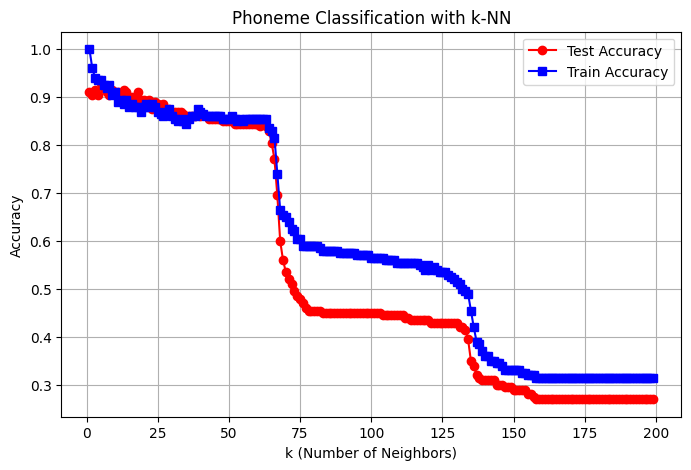

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

# ------------------------
# Load Phoneme Dataset (400 items, 256 features + 1 label)
# ------------------------
# Open the HDF5 file in read mode
Dataset3 = h5py.File('/content/Lab1_Ex_03.hdf5')
# Access the data structure named 'Dataset' within the file and convert it to a NumPy array
Data = np.array(Dataset3.get('Dataset'))

# Split: 200 train, 200 test
# Select the first 200 rows for the training set
Train_Set = Data[:200,:]
# Select all remaining rows (from index 200 onwards) for the test set
Test_Set = Data[200:,:]

# ------------------------
# Generalized Euclidean distance function (256 dimensions)
# ------------------------
def euclideanDistance(vec1, vec2):
    # This function calculates the Euclidean distance between two vectors of any length.
    # (vec1 - vec2) performs element-wise subtraction.
    # (...)**2 squares each element of the resulting difference vector.
    # np.sum() adds all the squared differences together.
    # np.sqrt() takes the square root of the total sum.
    return np.sqrt(np.sum((vec1 - vec2)**2))

# ------------------------
# k-NN: calculate distance between sample and all training samples
# ------------------------
def knn(sample, Train_Set, k):
    # Create an empty 2D array to store [distance, label] for each point in the training set
    Train_SetCopy = np.zeros((len(Train_Set), 2))  # col0 = distance, col1 = label

    # Iterate through every sample in the training set
    for i in range(len(Train_Set)):
        # Calculate the distance between the input 'sample' and the features of the current training sample.
        # Train_Set[i,:-1] selects all columns *except* the last one (the features).
        distanza = euclideanDistance(sample, Train_Set[i,:-1])  # only features

        # Store the calculated distance in the first column
        Train_SetCopy[i][0] = distanza
        # Store the corresponding label (the very last column, index -1) in the second column
        Train_SetCopy[i][1] = Train_Set[i,-1]  # label = last column

    # Sort the array based on the first column (distance) in ascending order
    # np.argsort(Train_SetCopy[:, 0]) returns the *indices* that would sort the distance column.
    # We then use these indices to reorder the rows of the entire Train_SetCopy array.
    Train_SetCopy = Train_SetCopy[np.argsort(Train_SetCopy[:, 0])]

    # Return only the first 'k' rows, which are the k-nearest neighbors
    return Train_SetCopy[:k]

# ------------------------
# Predict the class (majority vote)
# ------------------------
def predict(vicini):
    # 'vicini' (neighbors) is the (k, 2) array of [distance, label]
    # Extract just the labels (the second column)
    labels = vicini[:,1]
    # Find the unique class labels present in the neighbors and count their occurrences
    unique, counts = np.unique(labels, return_counts=True)
    # Find the index of the maximum count (np.argmax)
    # Use this index to retrieve the corresponding class label from the 'unique' array
    # This is the "majority vote"
    return unique[np.argmax(counts)]

# ------------------------
# Accuracy on a dataset
# ------------------------
def accuracy(dataset, Train_Set, k):
    # Initialize a counter for the number of correct predictions
    correct = 0

    # Loop through every sample in the 'dataset' we want to evaluate (e.g., Test_Set or Train_Set)
    for i in range(len(dataset)):
        # Extract the features for the current sample (all columns except the last one)
        sample = dataset[i,:-1]  # all features

        # Find the k-nearest neighbors for this sample from the *main* Train_Set
        vicini = knn(sample, Train_Set, k)

        # Predict the class for this sample
        predizione = predict(vicini)

        # Check if the prediction matches the true label (the last column of the current sample)
        if predizione == dataset[i,-1]:
            # If the prediction is correct, increment the counter
            correct += 1

    # Return the final accuracy: (total correct) / (total samples)
    return correct / len(dataset)

# ------------------------
# Test on various k values
# ------------------------
# Define the range of 'k' values to test. Here, from 1 to 199.
k_range = range(1, 200)
# Initialize empty lists to store the accuracy scores for each 'k'
test_acc = []
train_acc = []

print(f"Calculating accuracy for k=1 to {k_range.stop-1}...") # Added feedback

# Loop through every 'k' value in the specified range
for k in k_range:
    # Calculate the accuracy on the test set (measures generalization)
    acc_test = accuracy(Test_Set, Train_Set, k)
    # Append the result to the test accuracy list
    test_acc.append(acc_test)

    # Calculate the accuracy on the training set (measures overfitting)
    acc_train = accuracy(Train_Set, Train_Set, k)
    # Append the result to the train accuracy list
    train_acc.append(acc_train)

    # (Commented-out print statement for debugging each step)
    #print(f"k={k}: Train Acc={acc_train:.3f}, Test Acc={acc_test:.3f}")

print("Plotting results...") # Added feedback

# ------------------------
# Plot Accuracy vs k
# ------------------------
# Create a new figure with a specific size
plt.figure(figsize=(8,5))
# Plot the test accuracy vs. 'k'
plt.plot(k_range, test_acc, marker='o', color='red', label="Test Accuracy")
# Plot the train accuracy vs. 'k' on the same graph
plt.plot(k_range, train_acc, marker='s', color='blue', label="Train Accuracy")
# Add labels for the axes and a title
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("Phoneme Classification with k-NN")
# Display the legend to identify the lines
plt.legend()
# Add a grid for readability
plt.grid(True)
# Show the final plot
plt.show()

**Student's comments to exercise 3**

Questo esercizio risolve il problema di come scegliere il valore ottimale per gli iperparametri, come il $\lambda$ (o alpha) introdotto nell'Esercizio 2.Il Problema: Non possiamo usare il Test Set per scegliere $\lambda$. Se provassimo 100 $\lambda$ diversi e scegliessimo quello con l'MSE migliore sul test set, avremmo "barato", contaminando il test set. La nostra stima delle performance sarebbe falsata (troppo ottimistica).La Soluzione (K-Fold Cross-Validation):Questa tecnica permette di simulare un test set senza toccare quello vero.Si divide il Training Set in $K$ parti (es. $K=5$ "fold").Si itera $K$ volte: si addestra il modello (es. con $\lambda=0.1$) su $K-1$ parti e si calcola l'errore sulla parte rimanente (il Validation Set).Si calcola l'errore medio sui $K$ fold per quel $\lambda$.Si ripete l'intero processo per molti $\lambda$ diversi (es. 0.01, 0.1, 1, 10, 100).Si sceglie il $\lambda^*$ che ha dato l'errore medio più basso.Infine, si addestra un singolo modello finale usando $\lambda^*$ sull'intero Training Set.Solo a questo punto si usa il Test Set (messo da parte all'inizio) una sola volta per valutare le performance finali e oneste del modello scelto.GridSearchCV di sklearn è lo strumento che automatizza l'intero processo (i passi 1-5).